In [8]:

from read_hdf import read_hdf
import numpy as np
hdffiles =[]
for indx in range(000,800,1):
    hdffiles.append('hdfra.%03d'%indx) 

filename = hdffiles[537]  
print(filename)
hdfdata = read_hdf("../Test38/exe_compact_S/"+filename)

print(hdfdata.x1b.shape)
print(hdfdata.x2b.shape)
print(hdfdata.x3b.shape)
from precal import r_a, thata_a
x = r_a(8e-4,160,1.1,120)
y = thata_a(0.15708,2.98451,30)


hdfra.537
Reading ../Test38/exe_compact_S/hdfra.537 of time = 6.71
(120,)
(30,)
(1,)


## 对Inflow问题的重新计算

In [24]:
import numpy as np
import matplotlib.pyplot as plt

import macer_constant
from precal import r_a, thata_a
from read_hdf import read_hdf

d_theta = (2.98451-0.15708)/30 #angle is equal

r = r_a(8e-4,160,1.1,120)
gas_inflow = []
gas_outflow = []

for indx in range(000,800,1):
    hdfdata = read_hdf("../Test38/exe_compact_S/"+"hdfra.%03d"%indx)
    
    d_inflow = np.zeros(hdfdata.dims)
    d_outflow = np.zeros(hdfdata.dims)

    for i in range(0,30):
        for j in range(0,120):
            if hdfdata.v1[i,j] < 0:
                d_inflow[i,j] = hdfdata.d[i,j] * np.abs(hdfdata.v1[i,j]*4*np.pi*r[j]**2*np.sin(hdfdata.x2b[i])*d_theta*2.5e-2) #Msun/yr,can also be a function
            else:
                d_outflow[i,j] = hdfdata.d[i,j] * np.abs(hdfdata.v1[i,j]*4*np.pi*r[j]**2*np.sin(hdfdata.x2b[i])*d_theta*2.5e-2) #Msun/yr
    
    d_inflow = np.sum(d_inflow,axis=0) /2     #the inflow rate is analge-averaged 
    d_outflow = np.sum(d_outflow,axis=0) /2   

    gas_inflow.append(d_inflow)
    gas_outflow.append(d_outflow)

gas_inflow = np.array(gas_inflow)
gas_outflow = np.array(gas_outflow)

gas_inflow = np.mean(gas_inflow,axis=0)     #time-averaged
gas_outflow = np.mean(gas_outflow,axis=0)

print(gas_inflow.shape)
print(gas_outflow.shape)



Reading ../Test38/exe_compact_S/hdfra.000 of time = 0.0
Reading ../Test38/exe_compact_S/hdfra.001 of time = 0.0125
Reading ../Test38/exe_compact_S/hdfra.002 of time = 0.025
Reading ../Test38/exe_compact_S/hdfra.003 of time = 0.0375
Reading ../Test38/exe_compact_S/hdfra.004 of time = 0.05
Reading ../Test38/exe_compact_S/hdfra.005 of time = 0.0625
Reading ../Test38/exe_compact_S/hdfra.006 of time = 0.075
Reading ../Test38/exe_compact_S/hdfra.007 of time = 0.0875
Reading ../Test38/exe_compact_S/hdfra.008 of time = 0.1
Reading ../Test38/exe_compact_S/hdfra.009 of time = 0.113
Reading ../Test38/exe_compact_S/hdfra.010 of time = 0.125
Reading ../Test38/exe_compact_S/hdfra.011 of time = 0.138
Reading ../Test38/exe_compact_S/hdfra.012 of time = 0.15
Reading ../Test38/exe_compact_S/hdfra.013 of time = 0.163
Reading ../Test38/exe_compact_S/hdfra.014 of time = 0.175
Reading ../Test38/exe_compact_S/hdfra.015 of time = 0.188
Reading ../Test38/exe_compact_S/hdfra.016 of time = 0.2
Reading ../Test38/

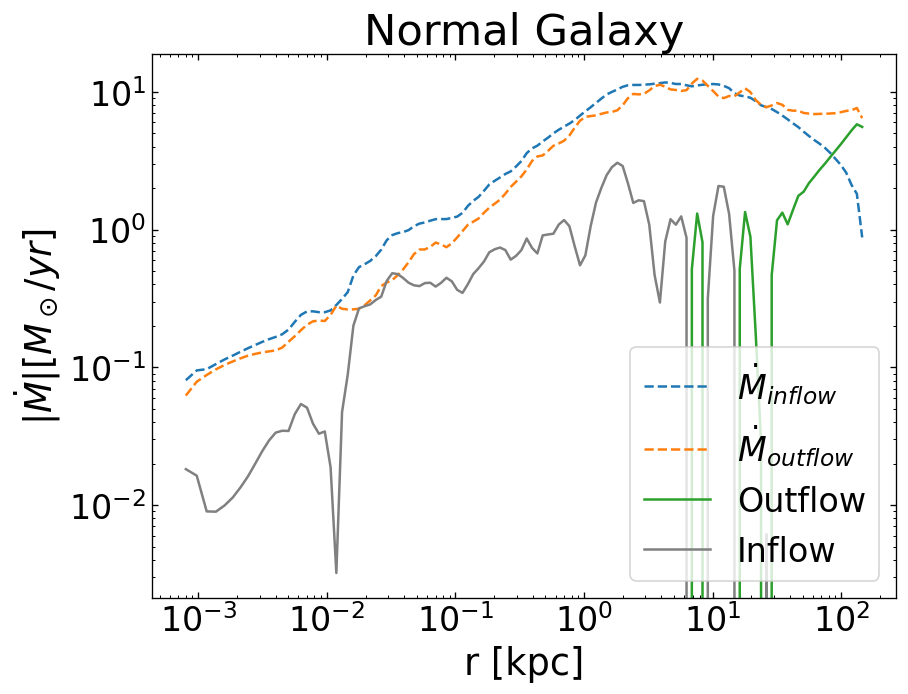

In [23]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(8,6),dpi=120)

ax.set_title('Normal Galaxy',size=26)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylabel('$| \dot{M}| [M_\odot / yr]$',size=22)
ax.set_xlabel('r [kpc]',size=22)

ax.plot(r[:-1],gas_inflow,ls='--',label='$\dot{M}_{inflow}$')
ax.plot(r[:-1],gas_outflow,ls='--',label='$\dot{M}_{outflow}$')
ax.plot(r[:-1],gas_outflow-gas_inflow,label='Outflow')
ax.plot(r[:-1],gas_inflow-gas_outflow,c='gray',label="Inflow")

ax.legend(loc=4,prop={'size':20})


plt.minorticks_on()
plt.tick_params(axis='both',which='both',direction='in',top=True,right=True)
plt.tick_params(labelsize=20)